In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
import warnings
warnings.simplefilter('ignore')

In [2]:
from sklearn import datasets
#Intially our dataset is in array format we need to covert in to dataframe by using pandas library 
boston=datasets.load_boston()

In [3]:
#Convert in to dataframe
df=pd.DataFrame(boston.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
df.columns=boston.feature_names

In [5]:
df['Target']=boston.target

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
print('No of records:{0}'.format(df.shape[0]))
print('No of features:{0}'.format(df.shape[1]))

No of records:506
No of features:14


In [8]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Target'],
      dtype='object')

In [9]:
#Get the info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [10]:
miss_data=pd.DataFrame({"Missing_values":df.isnull().sum(),'Percentage':(df.isnull().sum()/df.shape[0])*100})
miss_data

,Missing_values,Percentage
CRIM,0,0.0
ZN,0,0.0
INDUS,0,0.0
CHAS,0,0.0
NOX,0,0.0
RM,0,0.0
AGE,0,0.0
DIS,0,0.0
RAD,0,0.0
TAX,0,0.0


In [11]:
count_data=pd.DataFrame({"Unique_values":df.nunique(),'Dtype':df.dtypes})
count_data

,Unique_values,Dtype
CRIM,504,float64
ZN,26,float64
INDUS,76,float64
CHAS,2,float64
NOX,81,float64
RM,446,float64
AGE,356,float64
DIS,412,float64
RAD,9,float64
TAX,66,float64


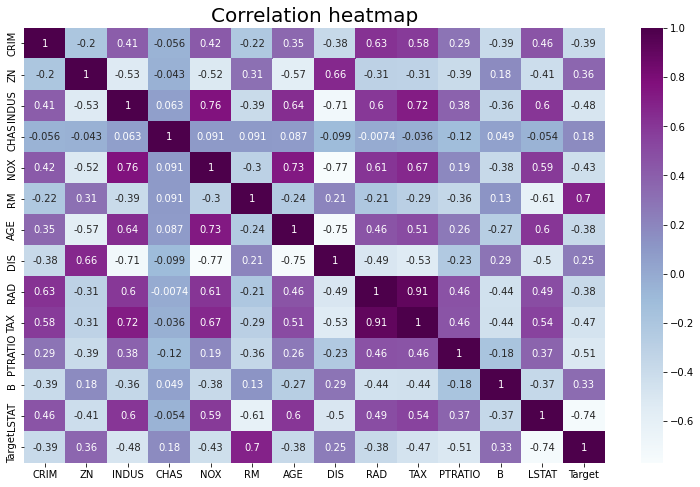

In [12]:
plt.figure(figsize=(13,8))
ax=sns.heatmap(df.corr(),annot=True,cmap='BuPu')
ax.set_title('Correlation heatmap',fontsize=20)
plt.show()

In [13]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Target'],
      dtype='object')

In [14]:
import statsmodels.formula.api as smf
sm=smf.ols(formula='Target~CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT',data=df).fit()
sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 29 May 2022   Prob (F-statistic):          6.72e-135
Time:                        16:26:20   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
#plot the distribution of the data
def plot_dist(data,variable):
    plt.figure(figsize=(10,7))
    plt.style.use('fivethirtyeight')
    ax=sns.distplot(data[variable],bins=30)
    ax.set_title(variable)
    plt.show()
    return ax

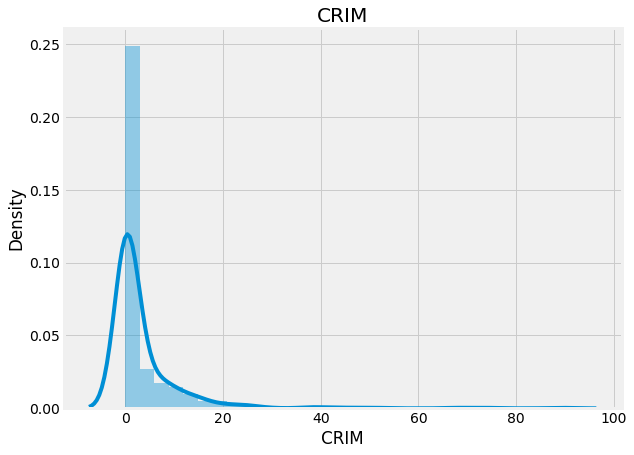

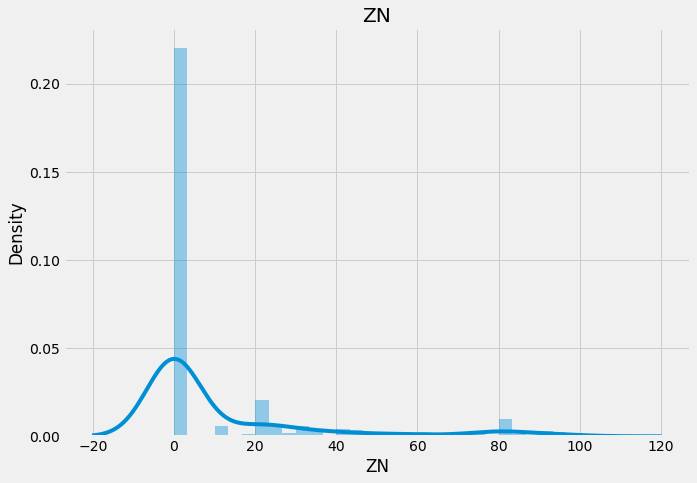

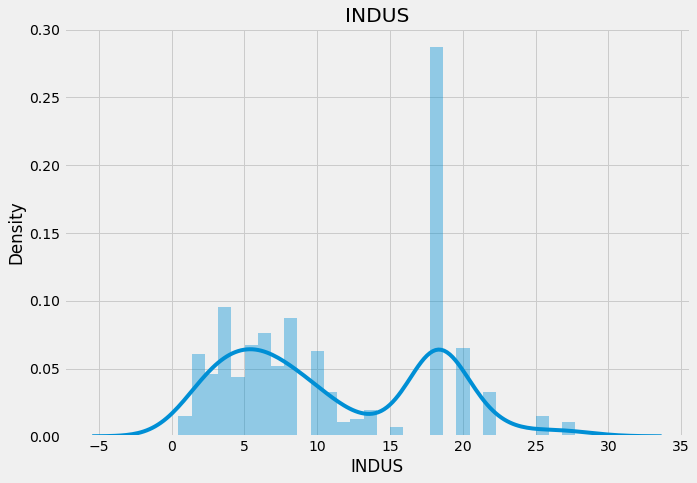

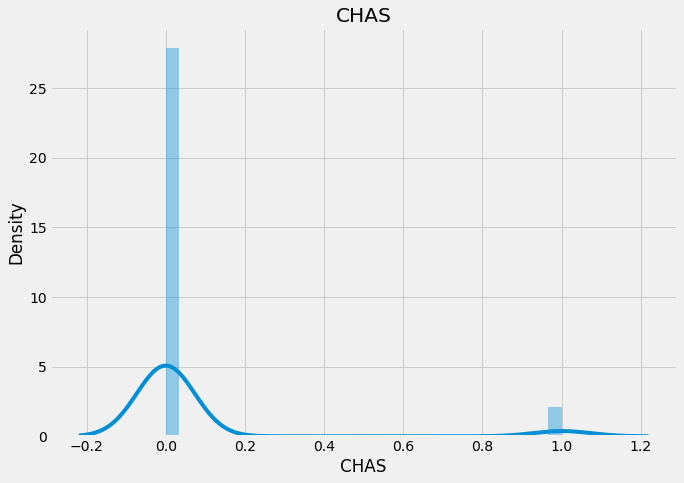

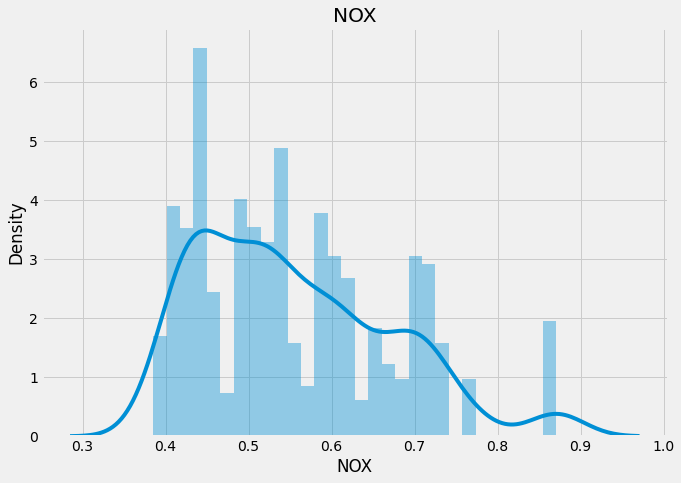

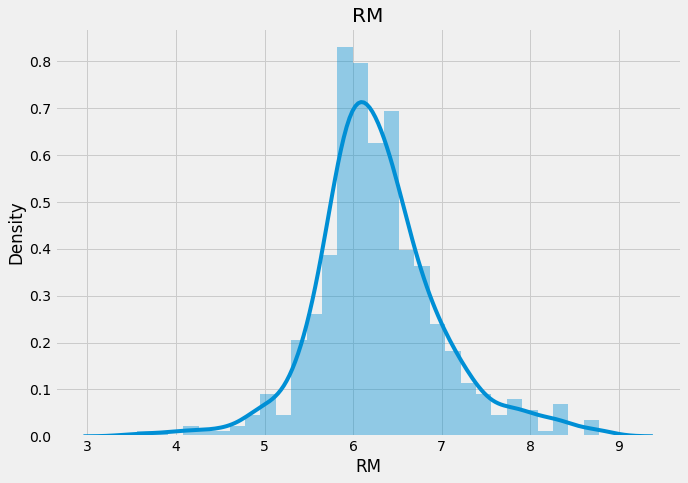

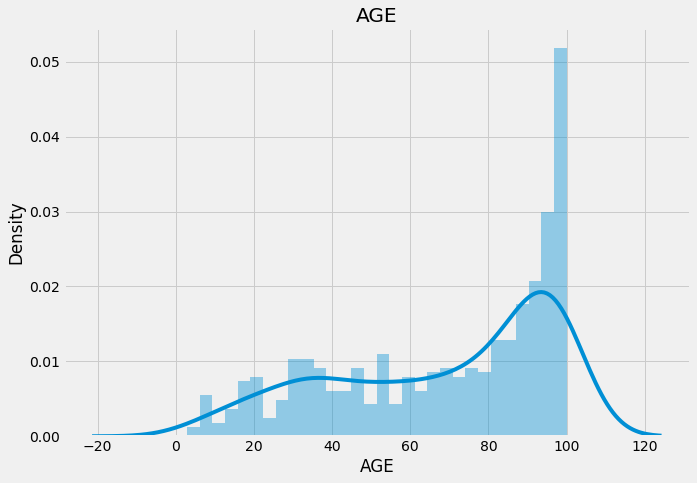

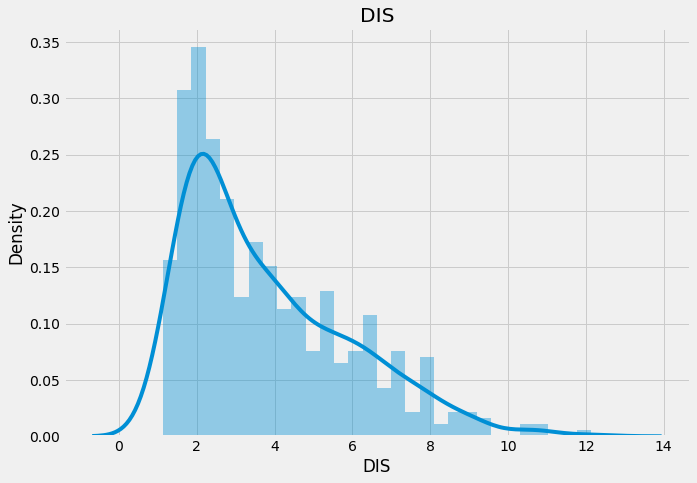

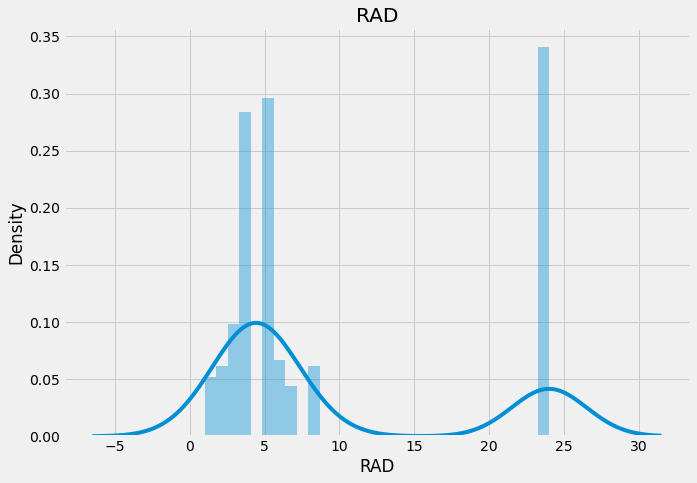

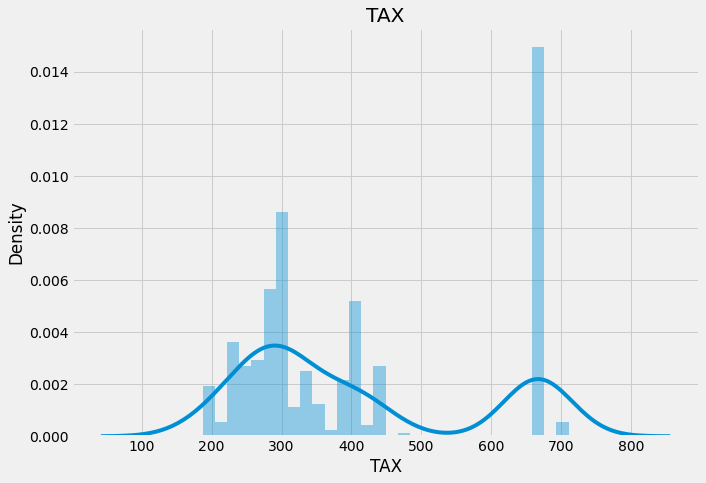

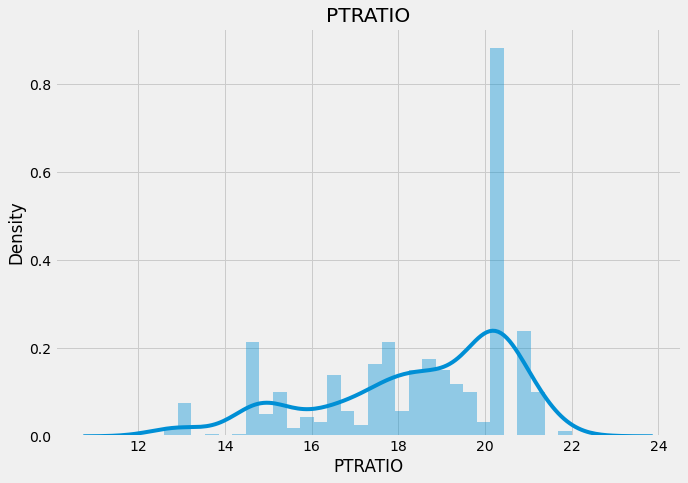

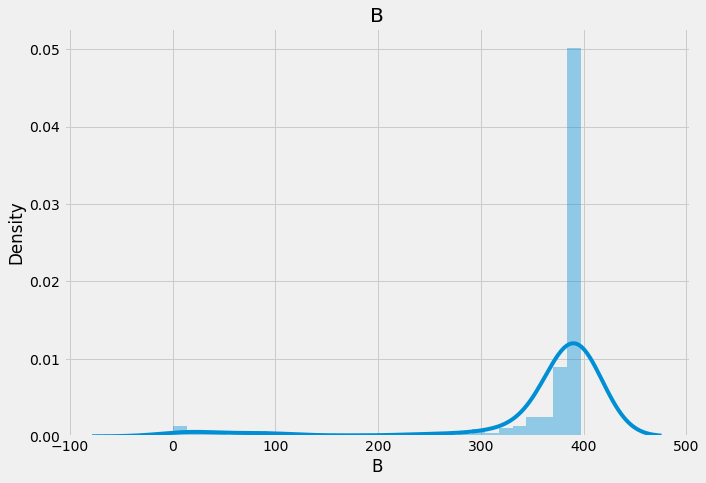

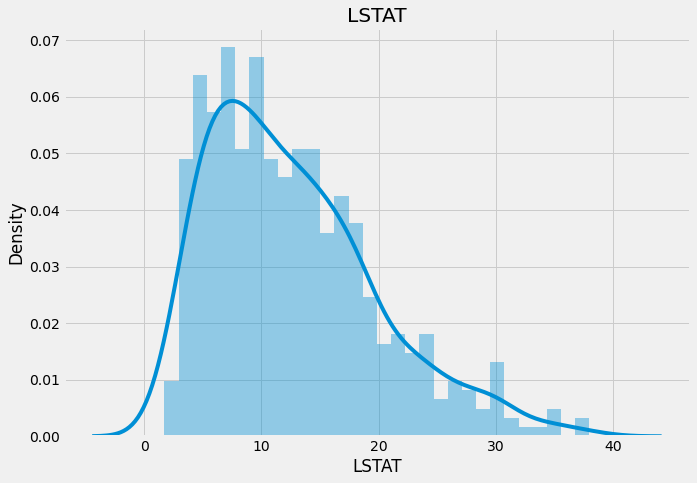

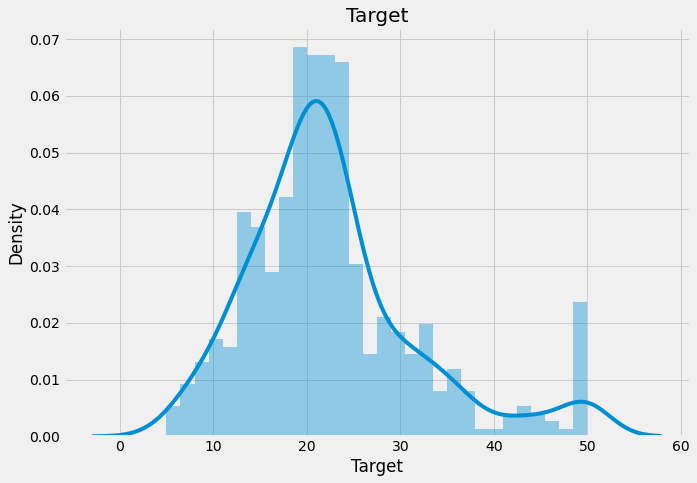

In [16]:
for i in df.columns:
    plot_dist(df,i)

In [17]:
x=df.drop('Target',1)
y=df['Target']

In [18]:
#Scale down the all values in to same vectors
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=sc.fit_transform(x)

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable=x_scaled
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variable,i) for i in range(variable.shape[1])]
vif['features']=x.columns

In [20]:
vif

,VIF,features
0,1.792192,CRIM
1,2.298758,ZN
2,3.991596,INDUS
3,1.073995,CHAS
4,4.393720,NOX
5,1.933744,RM
6,3.100826,AGE
7,3.955945,DIS
8,7.484496,RAD
9,9.008554,TAX


In [21]:
x_new=x.drop('TAX',1)

In [22]:
#Feature selection
from sklearn.tree import ExtraTreeRegressor
extra=ExtraTreeRegressor()
extra.fit(x_new,y)

ExtraTreeRegressor()

In [23]:
extra.feature_importances_

array([0.08889369, 0.00351895, 0.18213062, 0.020051  , 0.02486902,
       0.33787981, 0.01522423, 0.04475937, 0.03724271, 0.00936426,
       0.02293871, 0.21312761])

In [24]:
extra_best=pd.DataFrame(extra.feature_importances_,index=x_new.columns,columns=['Value'])

In [25]:
extra_best

,Value
CRIM,0.088894
ZN,0.003519
INDUS,0.182131
CHAS,0.020051
NOX,0.024869
RM,0.337880
AGE,0.015224
DIS,0.044759
RAD,0.037243
PTRATIO,0.009364


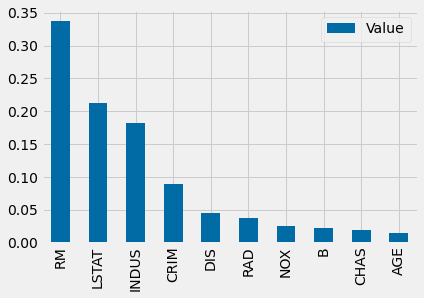

In [26]:
plt.style.use('tableau-colorblind10')
extra_best.nlargest(10,'Value').plot.bar()

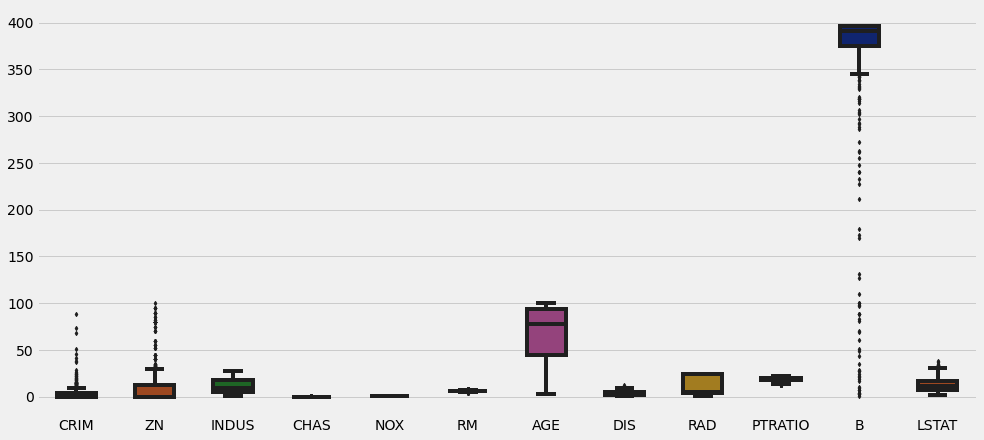

In [27]:
#Check any outiler's are present in the data which makes our result poor
fig,ax=plt.subplots(figsize=(15,7))
sns.boxplot(data=x_new,ax=ax,fliersize=3,width=0.5,palette='dark')

In [28]:
#split the data in to train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.2,random_state=0)

In [29]:
#Standardize the values in to the same vectors
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [30]:
#Modle building
#Linear Regression
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [31]:
#predict on the test data
reg_pred=reg.predict(x_test)
reg_pred[:5]

array([26.90774061, 23.72503516, 28.84409005, 12.04670157, 22.10478459])

In [32]:
reg.coef_

array([-0.96071774,  0.84866834, -0.53545186,  0.66983713, -1.94555307,
        2.64105262, -0.11365328, -2.87821591,  0.77998159, -2.35640329,
        0.7252443 , -3.57255359])

In [34]:
#intercept
reg.intercept_

22.611881188118804

In [35]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print('Mean absolue error: {0}'.format(mean_absolute_error(y_test,reg_pred)))
print('Mean squared error: {0}'.format(mean_squared_error(y_test,reg_pred)))
print('r2_score: {0}'.format(r2_score(y_test,reg_pred)))

Mean absolue error: 3.952887336133815
Mean squared error: 34.36441441048649
r2_score: 0.5779801896440164


In [36]:
pred_val=pd.DataFrame({'Predicted':reg_pred,'Actual':y_test})

In [37]:
pred_val.head()

,Predicted,Actual
329,26.907741,22.6
371,23.725035,50.0
219,28.844090,23.0
403,12.046702,8.3
78,22.104785,21.2


In [38]:
from sklearn.linear_model import Lasso
lasso=Lasso()
parameters={"alpha":[0.01,0.001,0.02,0.002,0.03,0.004,0.0001,0.007,0.008]}
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
lasso_grid=RandomizedSearchCV(lasso,param_distributions=parameters,cv=10,n_iter=50,n_jobs=-1,verbose=2)
lasso_grid.fit(x_train,y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


RandomizedSearchCV(cv=10, estimator=Lasso(), n_iter=50, n_jobs=-1,
                   param_distributions={'alpha': [0.01, 0.001, 0.02, 0.002,
                                                  0.03, 0.004, 0.0001, 0.007,
                                                  0.008]},
                   verbose=2)

In [39]:
lasso_pred=lasso_grid.predict(x_test)

In [40]:
print('Mean absolue error: {0}'.format(mean_absolute_error(y_test,lasso_pred)))
print('Mean squared error: {0}'.format(mean_squared_error(y_test,lasso_pred)))
print('r2_score: {0}'.format(r2_score(y_test,lasso_pred)))

Mean absolue error: 3.943651710491692
Mean squared error: 34.6874833503389
r2_score: 0.5740126698981594


In [41]:
from sklearn.linear_model import Ridge
ridge=Ridge()
parameters={'alpha':[0.01,0.001,0.02,0.002,0.03,0.004,0.0001,0.007,0.008]}
ridge_grid=GridSearchCV(ridge,param_grid=parameters,n_jobs=-1,cv=10,verbose=2,scoring='neg_mean_squared_error')
ridge_grid.fit(x_train,y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.001, 0.02, 0.002, 0.03, 0.004,
                                   0.0001, 0.007, 0.008]},
             scoring='neg_mean_squared_error', verbose=2)

In [42]:
ridge_pred=ridge_grid.predict(x_test)


In [43]:
print('Mean absolue error: {0}'.format(mean_absolute_error(y_test,ridge_pred)))
print('Mean squared error: {0}'.format(mean_squared_error(y_test,ridge_pred)))
print('r2_score: {0}'.format(r2_score(y_test,ridge_pred)))

Mean absolue error: 3.952877349739907
Mean squared error: 34.366095646972816
r2_score: 0.5779595428465868


In [44]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
random=RandomForestRegressor()
random.fit(x_train,y_train)

RandomForestRegressor()

In [45]:
random_pred=random.predict(x_test)
random_pred[:19]

array([24.247, 27.014, 21.631, 10.939, 21.052, 20.756, 21.122, 20.244,
       20.398, 18.472,  7.936, 15.689, 14.848,  8.628, 47.28 , 34.111,
       20.984, 34.958, 25.94 ])

In [46]:
pd.DataFrame({"Predicted":random_pred,'Actual':y_test}).head()

,Predicted,Actual
329,24.247,22.6
371,27.014,50.0
219,21.631,23.0
403,10.939,8.3
78,21.052,21.2


In [47]:
print('Mean absolue error: {0}'.format(mean_absolute_error(y_test,random_pred)))
print('Mean squared error: {0}'.format(mean_squared_error(y_test,random_pred)))
print('r2_score: {0}'.format(r2_score(y_test,random_pred)))

Mean absolue error: 2.781823529411766
Mean squared error: 20.803762647058825
r2_score: 0.7445147802569999


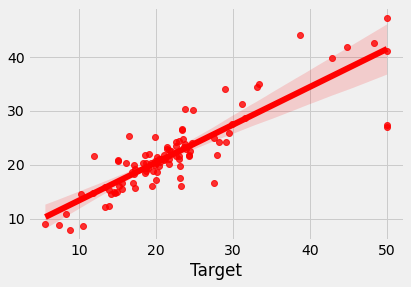

In [48]:
sns.regplot(y_test,random_pred,color='r')

In [49]:
x_new.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,18.7,396.90,5.33


In [50]:
#Predictions 1
data=np.array([[0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,15.3,396.90,4.98]])
predictions=random.predict(data)

In [51]:
print('The Predicted house price is :',predictions)

The Predicted house price is : [22.67]


In [52]:
#Predictions 2
data_2=np.array([[0.09,12,1,0,0.8,8,56,4,4,16,345,8]])
predictions_2=random.predict(data_2)

In [53]:
#prediction 3
data_3=x_new.iloc[1:2,:].values
predictions_3=random.predict(data_3)

In [54]:
#Dump the model
import pickle
filename='random.pickle'
pickle.dump(random,open(filename,'wb'))